# Tensor Decomposition

In [28]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorly as tl
import numpy as np
from tensorly.decomposition import parafac, tucker

## Import tensor data

In [29]:
# Load NumPy arrays from disk
low_tensor_np = np.load("low_tensor.npy")
low_tensor_norm_np = np.load("low_tensor_norm.npy")
high_tensor_np = np.load("high_tensor.npy")
high_tensor_norm_np = np.load("high_tensor_norm.npy")

# Convert NumPy arrays back to TensorLy tensors
low_tensor = tl.tensor(low_tensor_np)
low_tensor_norm = tl.tensor(low_tensor_norm_np)
high_tensor = tl.tensor(high_tensor_np)
high_tensor_norm = tl.tensor(high_tensor_norm_np)

print("Tensors loaded and converted back to TensorLy format successfully!")

Tensors loaded and converted back to TensorLy format successfully!


## CP

### Low tensor

In [30]:
low_weights_norm, low_factors_norm = parafac(low_tensor_norm, rank=4)
low_weights, low_factors = parafac(low_tensor, rank=4)
[f.shape for f in low_factors_norm]

[(100, 4), (8, 4), (13, 4)]

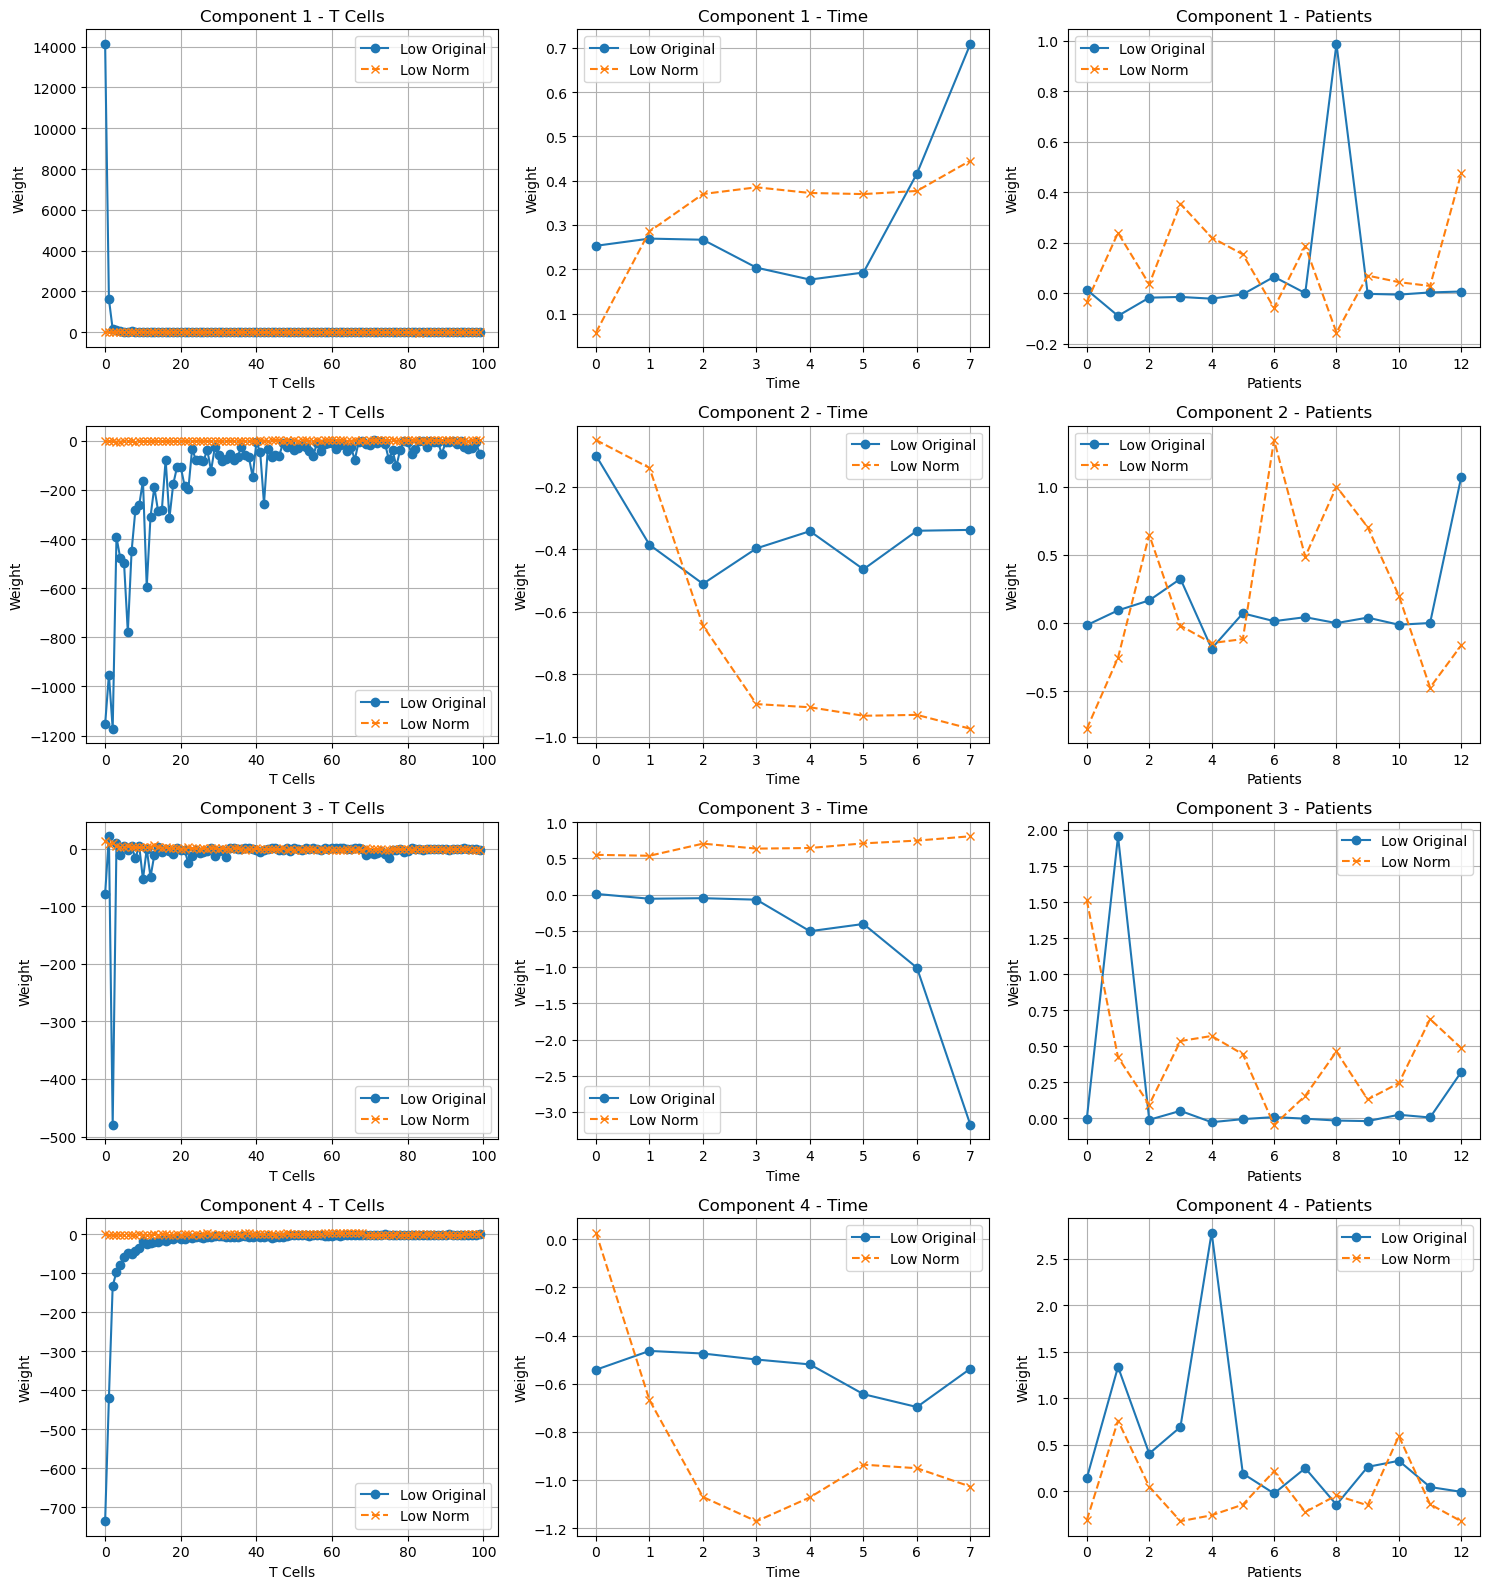

In [31]:
# VISUALIZATION
factor_labels = ["T Cells", "Time", "Patients"]
x_labels = [range(f.shape[0]) for f in low_factors]

num_components = low_factors[0].shape[1]

fig, axes = plt.subplots(num_components, 3, figsize=(15, 4 * num_components))

for component in range(num_components):
    for dim in range(3):
        ax = axes[component, dim]
        ax.plot(x_labels[dim], low_factors[dim][:, component], marker='o', linestyle='-', label='Low Original')
        ax.plot(x_labels[dim], low_factors_norm[dim][:, component], marker='x', linestyle='--', label='Low Norm')
        ax.set_title(f"Component {component+1} - {factor_labels[dim]}")
        ax.set_xlabel(factor_labels[dim])
        ax.set_ylabel("Weight")
        ax.grid(True)
        ax.legend(loc='best') 

plt.tight_layout()
plt.show()

### High tensor

In [32]:
high_weights_norm, high_factors_norm = parafac(high_tensor_norm, rank=4)
high_weights, high_factors = parafac(high_tensor, rank=4)
[f.shape for f in high_factors_norm]

[(100, 4), (20, 4), (13, 4)]

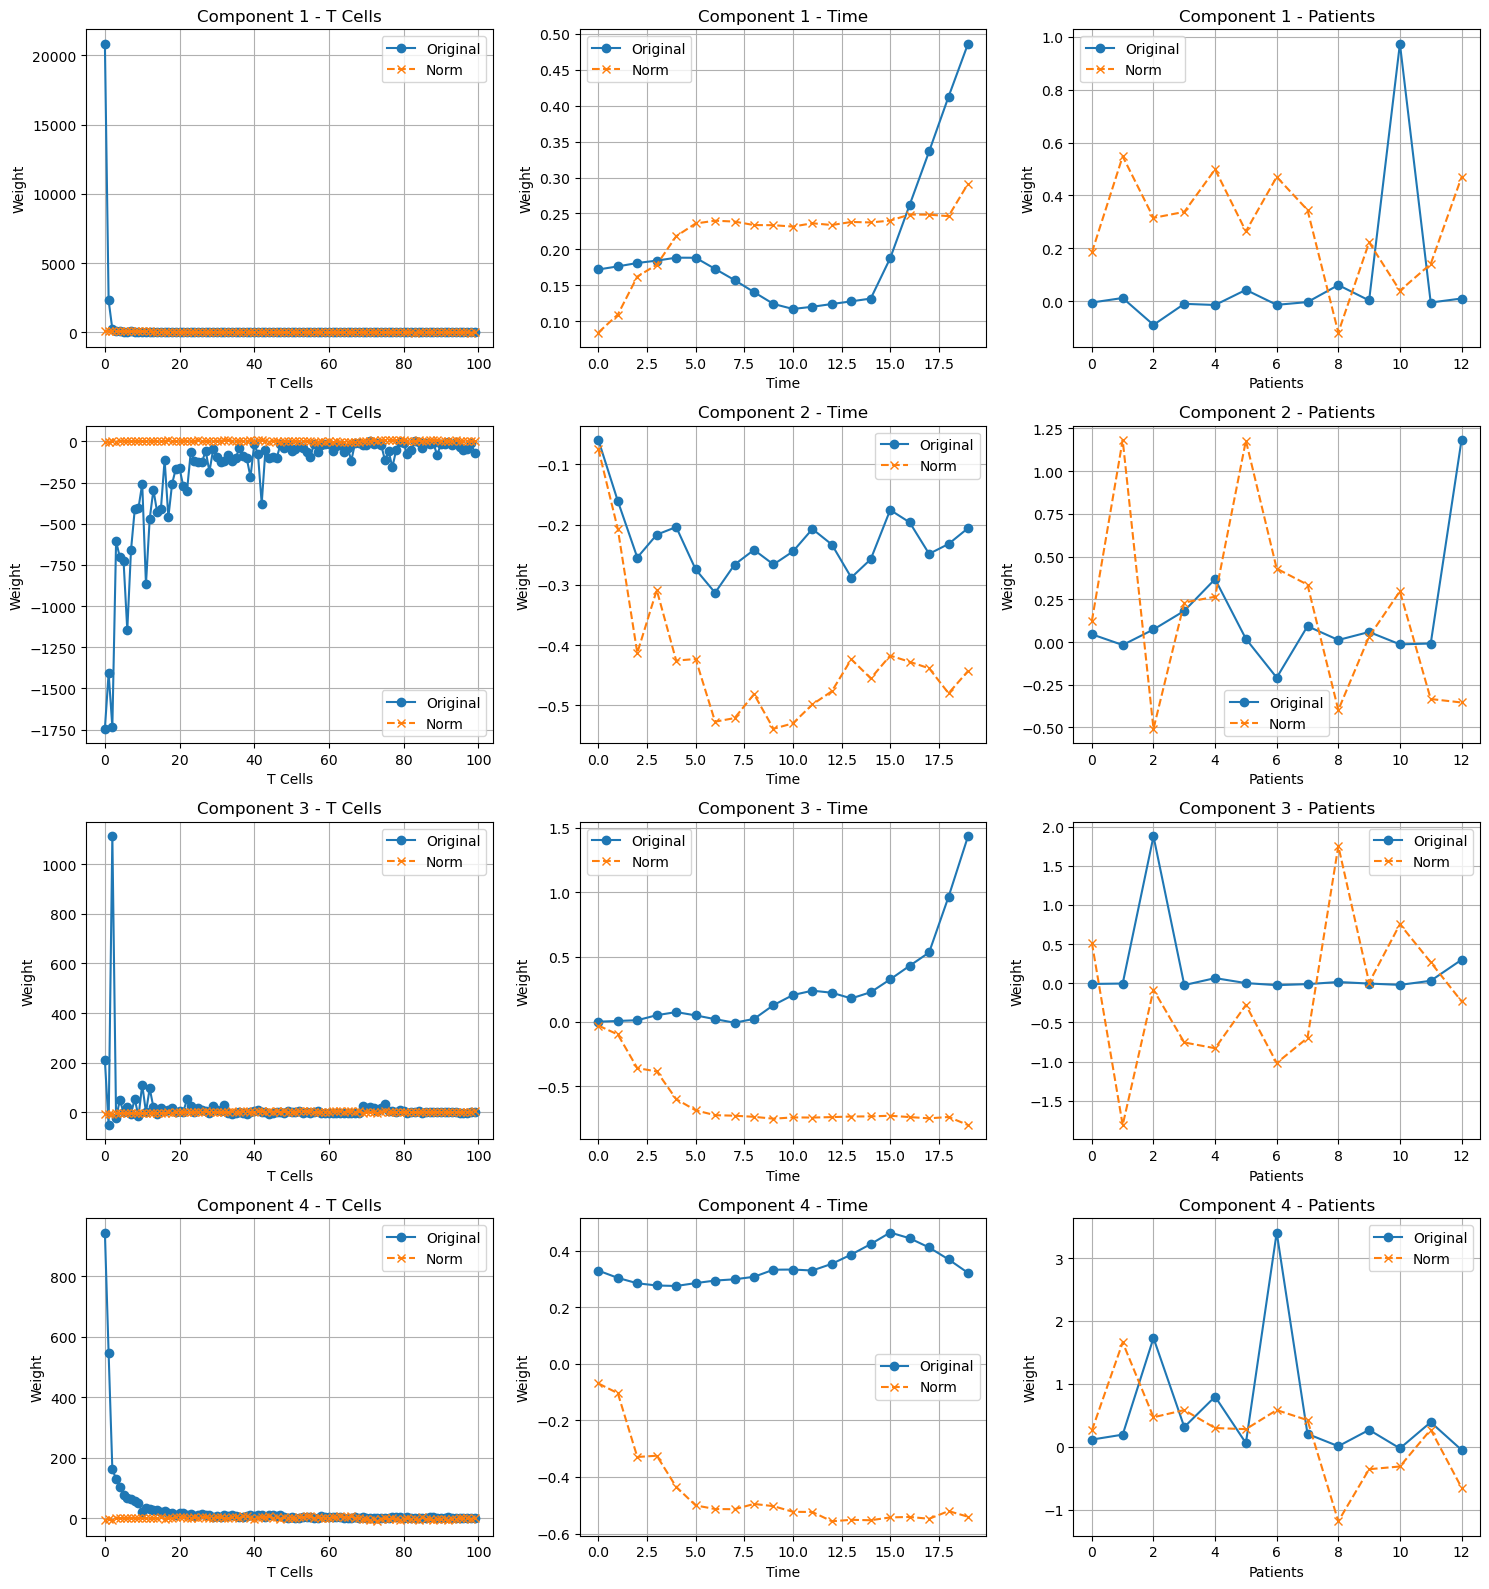

In [33]:
# VISUALIZATION
factor_labels = ["T Cells", "Time", "Patients"]
x_labels = [range(f.shape[0]) for f in high_factors]

num_components = high_factors[0].shape[1]

fig, axes = plt.subplots(num_components, 3, figsize=(15, 4 * num_components))

for component in range(num_components):
    for dim in range(3):
        ax = axes[component, dim]
        ax.plot(x_labels[dim], high_factors[dim][:, component], marker='o', linestyle='-', label='Original')
        ax.plot(x_labels[dim], high_factors_norm[dim][:, component], marker='x', linestyle='--', label='Norm')
        ax.set_title(f"Component {component+1} - {factor_labels[dim]}")
        ax.set_xlabel(factor_labels[dim])
        ax.set_ylabel("Weight")
        ax.grid(True)
        ax.legend(loc='best') 

plt.tight_layout()
plt.show()

## Tucker